## Demo code for Bayesian analysis

We first simulate the posterior distribution for the "heads probability" of a coin. The prior and posterior distributions are Beta distributions. 

Then, we simulate the posterior distribution for the weightings of a "three sided die" -- a multinomial on three outcomes. Here the prior and posterior distributions are Dirichlet.


In [4]:
import os, gzip
import numpy as np
import matplotlib.pyplot as plt


## Bayesian calculation for flipping a coin

Here we illustrate the basic Bayes inference scheme when the probability of heads is uncertain.


In [5]:
%matplotlib qt
from scipy.special import gamma
from scipy import random
from scipy.stats import beta

* the red curve is the prior distribution on the bias of the coin
* the evidence collected over time makes the distribution shift towards the true parameter, which is 0.8

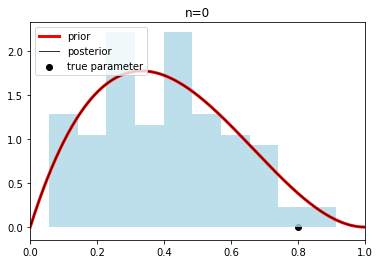

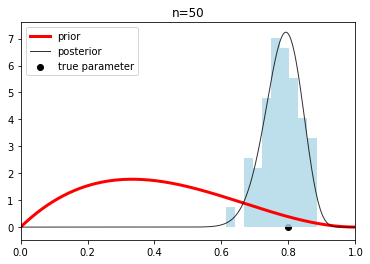

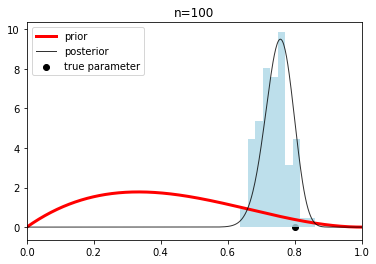

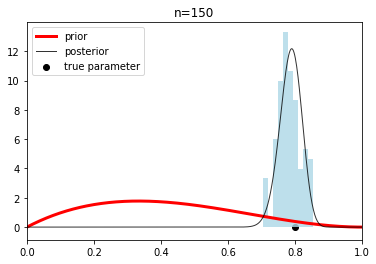

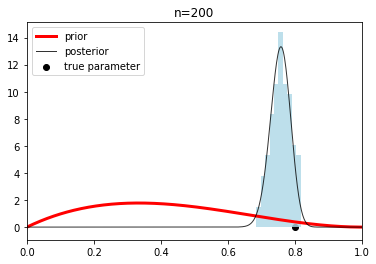

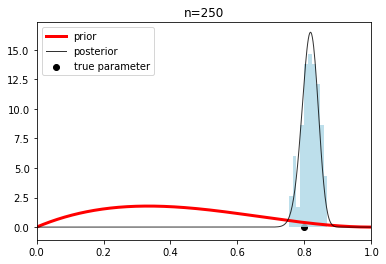

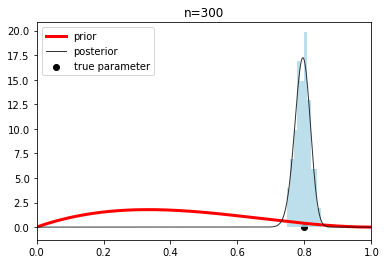

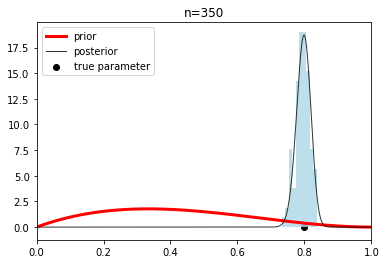

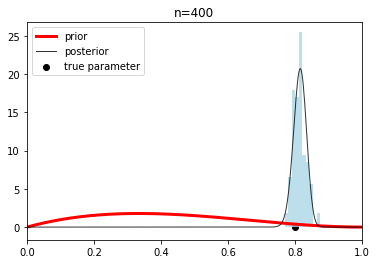

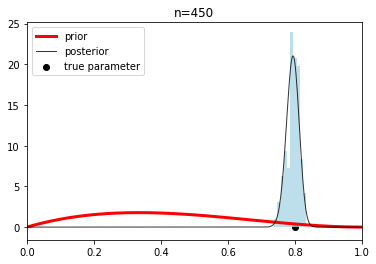

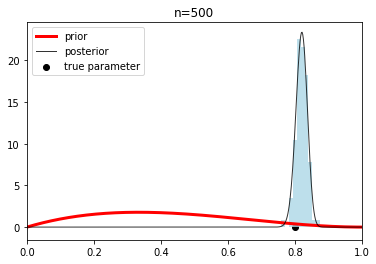

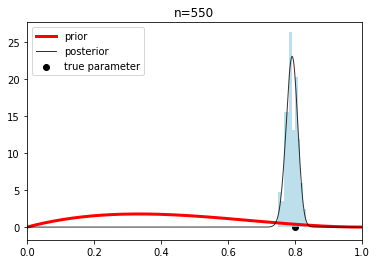

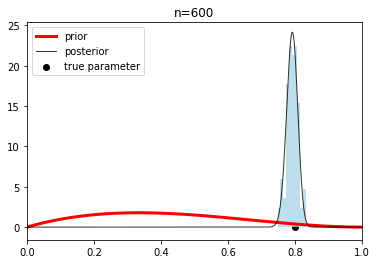

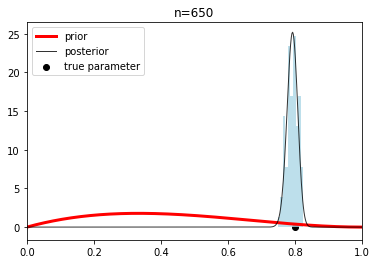

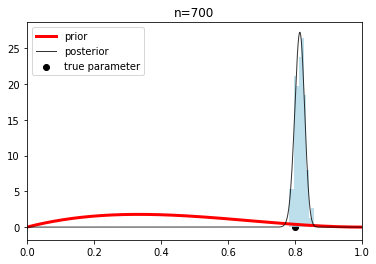

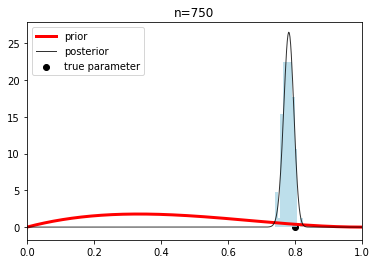

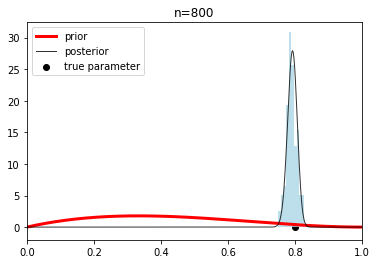

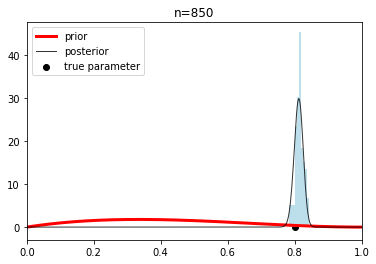

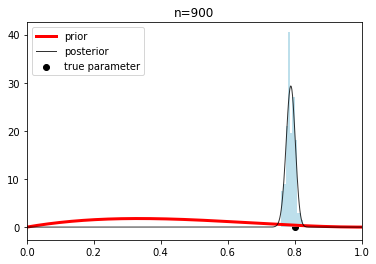

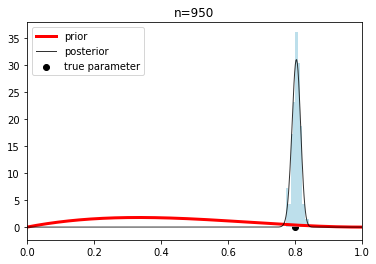

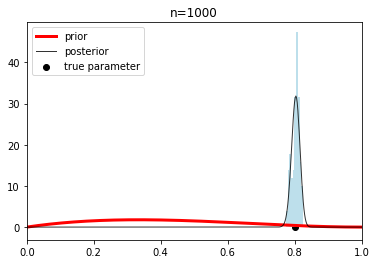

In [10]:
theta = np.linspace(0,1,num=500)
fig = plt.figure(1)
plt.ion()

# this is your strength of belief in prior
a0 = 1*2 # if too small, posterior distribution converges quickly, otherwise slowly 

b0 = 1*3
sample_size = 100
p = 0.8
prior = beta.pdf(theta, a0, b0)

for n in np.arange(0, 1001, 50):
    
    # sample from a coin with probability of heads p
    x = random.multinomial(n, pvals=[p, 1-p])
    
    # update alpha and beta parameters
    a = a0 + x[0]
    b = b0 + x[1]
    posterior = beta.pdf(theta, a, b)
    
    # sample from the posterior
    posterior_sample = np.random.beta(a, b, size=sample_size)
    
    # plot everything
    plt.cla()
    plt.title('n=%d' % n)
    plt.plot(theta, prior, linewidth=3, color='red', label='prior')
    plt.plot(theta, posterior, linewidth=1, color='black', alpha=.8, label='posterior')
    plt.xlim((0, 1))
    plt.hist(posterior_sample, density=True, color='lightblue', alpha=.8)
    plt.scatter([p], [0], color='black', label='true parameter')
    plt.legend(loc='upper left')
    plt.pause(0.5)

plt.close(fig)
plt.ioff()

## Dirichlet distributions

And here we do the same but for a "three-sided die", where the weighting of the die is uncertain. 


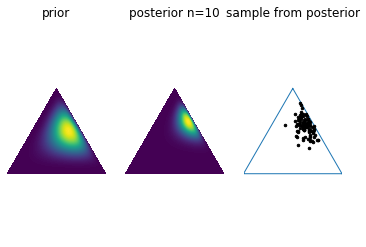

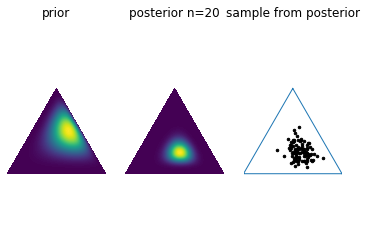

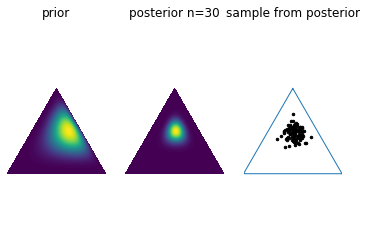

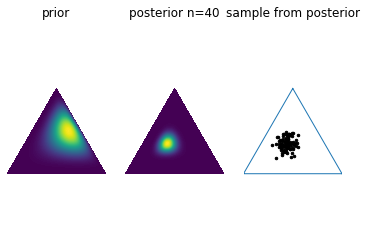

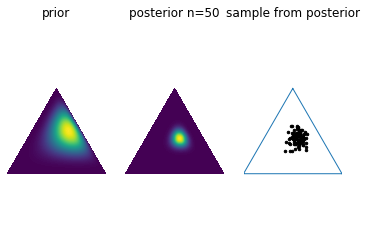

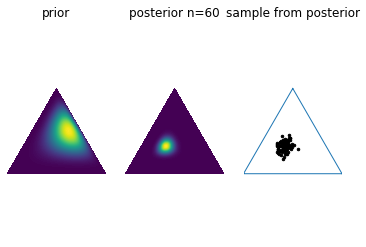

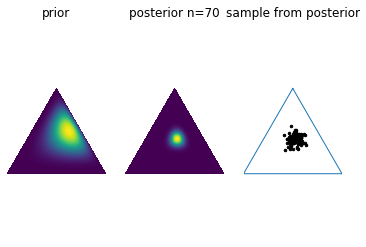

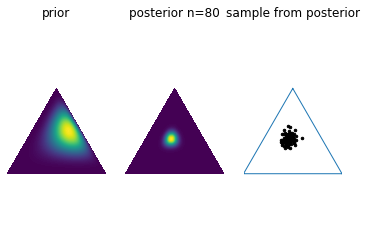

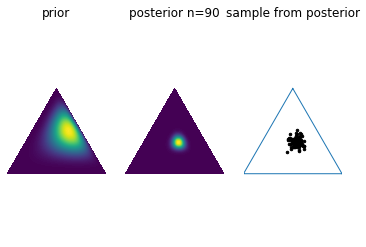

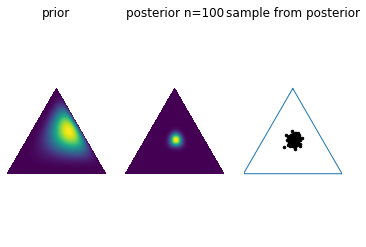

In [11]:
# the triangle shape is a 2D projection of a simplex in 3D space, formed from a 3-sided die
# like the coin flip, here the actual param value is wheree the glowy thing ceenters

import warnings
warnings.filterwarnings("ignore")
from dirichlet import *


fig = plt.figure(1)
plt.ion()

alpha0 = [2, 4, 5]
prior = Dirichlet(alpha0)
model = [.333, .333, .333]

for n in np.arange(10, 101, 10):
    
    x = random.multinomial(n, pvals=model)
    alpha = alpha0 + x
    posterior = Dirichlet(alpha)
    
    # plot prior
    plt.title('n=%d' % n)
    plt.subplot(131)
    plt.cla()
    plt.title('prior' % n)
    draw_pdf_contours(prior)
    
    # plot posterior
    plt.subplot(132)
    plt.cla()
    plt.title('posterior n=%d' % n)
    draw_pdf_contours(posterior)

    # plot sample from posterior
    plt.subplot(133)
    plt.cla()
    plt.title('sample from posterior')
    plot_points(posterior.sample(sample_size), markersize=5)
    plt.pause(0.5)
    
plt.close(fig)
plt.ioff()

## Sampling from a mixture

In the following bit of code, we illustrate how to sample from a mixture model. In this case we're sampling from a mixture of two Gaussians.


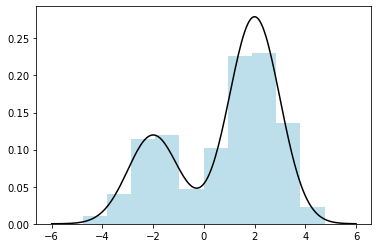

In [9]:
%matplotlib inline
import scipy.stats as sps

sample = []
weight = [0.3, 0.7] # this corresponds to the η parameter 

for i in np.arange(1000): # take 1000 samples 
    x = random.multinomial(1, pvals=weight) # flip a coin, looks like [0, 1] etc
    y0 = np.random.normal(loc=-2) # mean of -2, variaance 1
    y1 = np.random.normal(loc=2) # mean of 2, variance 1
    y = x[0]*y0 + x[1]*y1
    sample.append(y)

x = np.linspace(-6, 6, num=200)
mix = weight[0]*sps.norm(loc=-2).pdf(x) + weight[1]*sps.norm(loc=2).pdf(x)
_ = plt.hist(sample, density=True, color='lightblue', alpha=.8)
_ = plt.plot(x, mix, color='black')